In [53]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [54]:
x = numpy.arange(-5,5,0.1)
y = numpy.arange(-5,5,0.1)
X,Y = numpy.meshgrid(x,y)

In [55]:
def j_trans(z,c):
    j_trans = z + c**2/z
    return j_trans

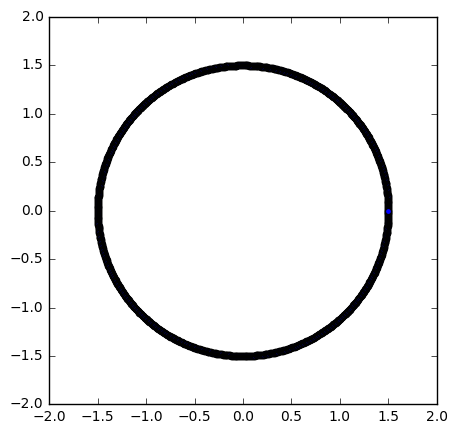

In [56]:
theta = numpy.linspace(0,2*math.pi,1000)
R = 1.5
c = 1.
x_circle = R*numpy.cos(theta)
y_circle = R*numpy.sin(theta)
pyplot.figure(figsize=(5,5))
pyplot.scatter(x_circle,y_circle)

In [57]:
z = x_circle + y_circle*1j
z_jtrans = j_trans(z,c)

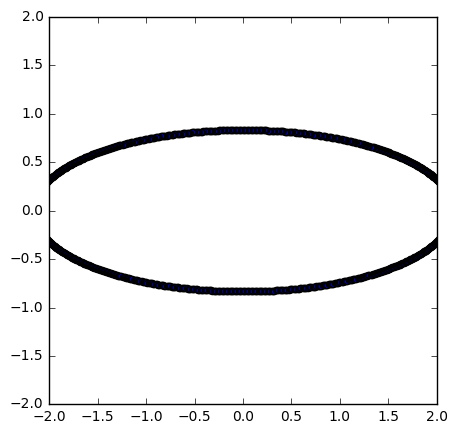

In [66]:
pyplot.figure(figsize = (5,5))
pyplot.xlim(-2,2)
pyplot.ylim(-2,2)
pyplot.scatter(z_jtrans.real,z_jtrans.imag)

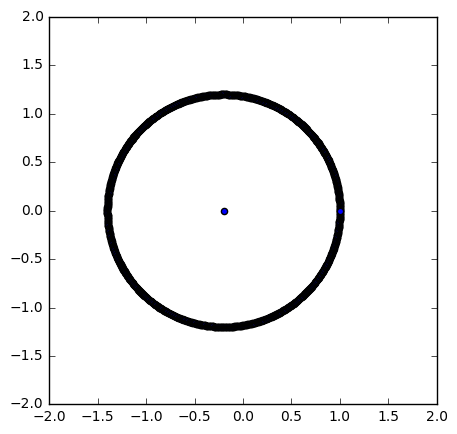

In [68]:
R_2 = 1.2
c_2 = 1.
x_2 = c_2 - R_2 + R_2*numpy.cos(theta)
y_2 = R_2*numpy.sin(theta)
pyplot.figure(figsize = (5,5))
pyplot.xlim(-2,2)
pyplot.ylim(-2,2)
pyplot.scatter(x_2,y_2)
pyplot.scatter(c_2-R_2,0)

In [69]:
z_2 = x_2 +y_2*1j
z_2trans = j_trans(z_2,c_2)

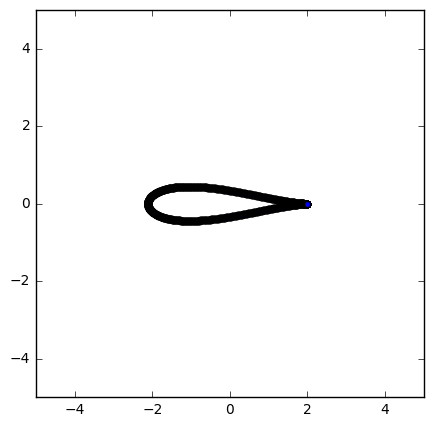

In [70]:
pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(z_2trans.real,z_2trans.imag)

---

In [81]:
delta_x = 0.1
delta_y = 0.1
R_3 = ((c-(-delta_x))**2 + delta_y**2)**0.5

In [82]:
x_3 = -delta_x +R_3*numpy.cos(theta)
y_3 = R_3*numpy.sin(theta)+delta_y
z_3 = x_3+y_3*1j
z_3trans = j_trans(z_3,c)

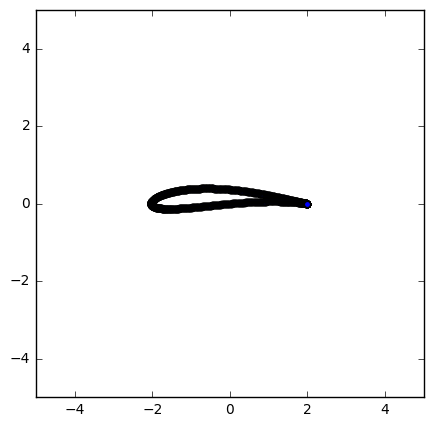

In [83]:
pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(z_3trans.real,z_3trans.imag)

---

In [90]:
R_4 = 1.15
x_4 = -0.15+R_4*numpy.cos(theta)
y_4 = R_4*numpy.sin(theta)
z_4 = x_4+y_4*1j
z_4trans = j_trans(z_4,c)


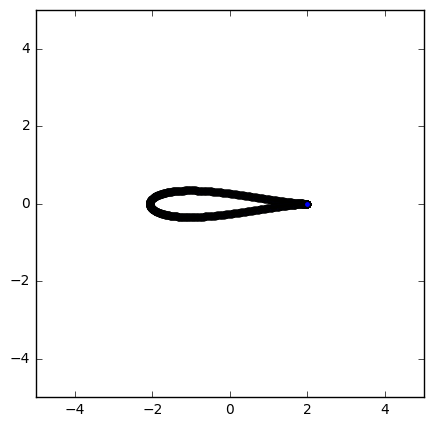

In [92]:
pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(z_4trans.real,z_4trans.imag)

In [99]:
N_r = 100
N_theta = 145
r = numpy.linspace(R_4,5,N_r)
theta_4 = numpy.linspace(0,2*math.pi,N_theta)
R,THETA = numpy.meshgrid(r,theta_4)

In [109]:
xx = -0.15+R*numpy.cos(THETA)
yy = 0+R*numpy.sin(THETA)

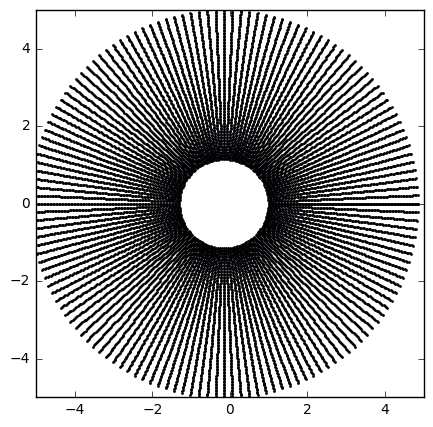

In [117]:
pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(xx,yy,s=1)

In [111]:
zz = xx+1j*yy
zz_trans=j_trans(zz,c)

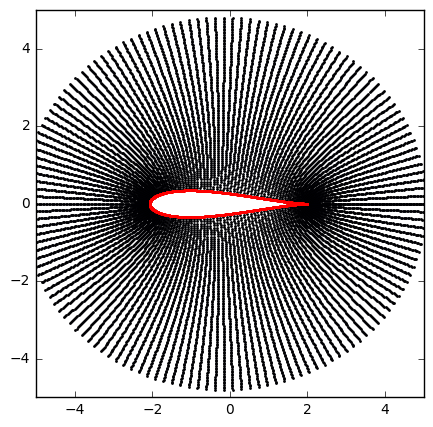

In [116]:
pyplot.figure(figsize = (5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.scatter(zz_trans.real,zz_trans.imag,s=1)
pyplot.scatter(z_4trans.real,z_4trans.imag,color = 'r',s=1)